**Setup & First Graph**

Nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Edges: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('E', 'F')]


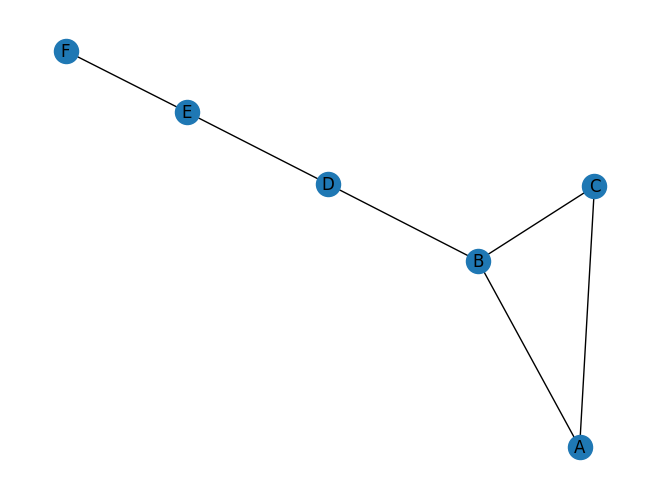

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# toy graph
G = nx.Graph()
G.add_edges_from([
    ("A", "B"), ("A", "C"),
    ("B", "C"), ("B", "D"),
    ("D", "E"), ("E", "F")
])

print("Nodes:", G.nodes())
print("Edges:", G.edges())
nx.draw(G, with_labels=True)
plt.show()


**Degree & Degree Distribution**

{'A': 2, 'B': 3, 'C': 2, 'D': 2, 'E': 2, 'F': 1}


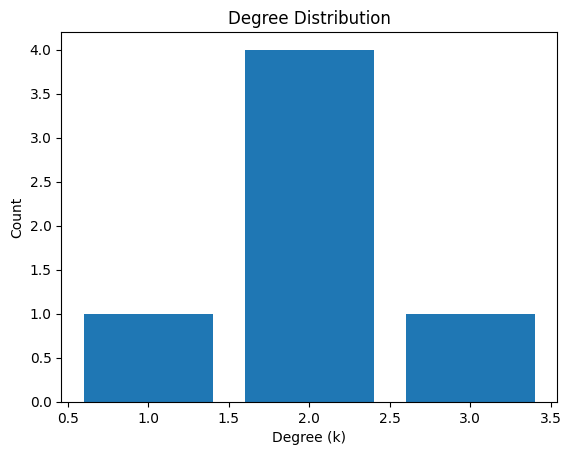

In [8]:
# Degree dictionary
deg = dict(G.degree()) # type: ignore
print(deg)

# Degree distribution
values = list(deg.values())
plt.hist(values, bins=range(1, max(values)+2), align="left", rwidth=0.8) # type: ignore
plt.xlabel("Degree (k)")
plt.ylabel("Count")
plt.title("Degree Distribution")
plt.show()


**Connected Components**

Connected components: [{'C', 'E', 'D', 'A', 'B', 'F'}]


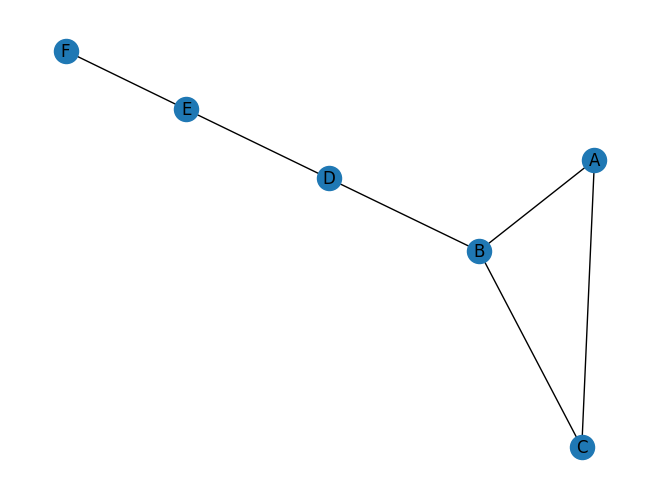

In [9]:
components = list(nx.connected_components(G))
print("Connected components:", components)

# Largest component as subgraph
largest_cc = G.subgraph(max(components, key=len))
nx.draw(largest_cc, with_labels=True)
plt.show()


**Shortest Paths**

In [10]:
# Shortest path between two nodes
print(nx.shortest_path(G, "A", "E"))
print("Length:", nx.shortest_path_length(G, "A", "E"))

# Average shortest path length
# (must be connected, so use largest_cc)
print("Average path length:", nx.average_shortest_path_length(G))


['A', 'B', 'D', 'E']
Length: 3
Average path length: 2.066666666666667


**Clustering & Triangles**

In [11]:
print("Clustering coefficients:", nx.clustering(G))
print("Average clustering:", nx.average_clustering(G))


Clustering coefficients: {'A': 1.0, 'B': 0.3333333333333333, 'C': 1.0, 'D': 0, 'E': 0, 'F': 0}
Average clustering: 0.3888888888888889


**Centrality**

In [12]:
print("Degree centrality:", nx.degree_centrality(G))
print("Closeness centrality:", nx.closeness_centrality(G))
print("Betweenness centrality:", nx.betweenness_centrality(G))


Degree centrality: {'A': 0.4, 'B': 0.6000000000000001, 'C': 0.4, 'D': 0.4, 'E': 0.4, 'F': 0.2}
Closeness centrality: {'A': 0.45454545454545453, 'B': 0.625, 'C': 0.45454545454545453, 'D': 0.625, 'E': 0.5, 'F': 0.35714285714285715}
Betweenness centrality: {'A': 0.0, 'B': 0.6000000000000001, 'C': 0.0, 'D': 0.6000000000000001, 'E': 0.4, 'F': 0.0}


**Modularity in NetworkX**

In [19]:
import networkx.algorithms.community as nx_comm

# Detect communities with a greedy modularity algorithm
communities = nx_comm.greedy_modularity_communities(G)
print("Communities:", communities)

# Compute Q value for this partition
q = nx_comm.modularity(G, communities)
print("Modularity Q:", q)

for c in communities:
  print(list(c)) #turn into a list


Communities: [frozenset({'A', 'B', 'C'}), frozenset({'E', 'D', 'F'})]
Modularity Q: 0.3194444444444445
['A', 'B', 'C']
['E', 'D', 'F']


The frozenset above is an immutable set. This means the communities (groups of nodes) cannot be changed once detected.

**Mini-Exercise**

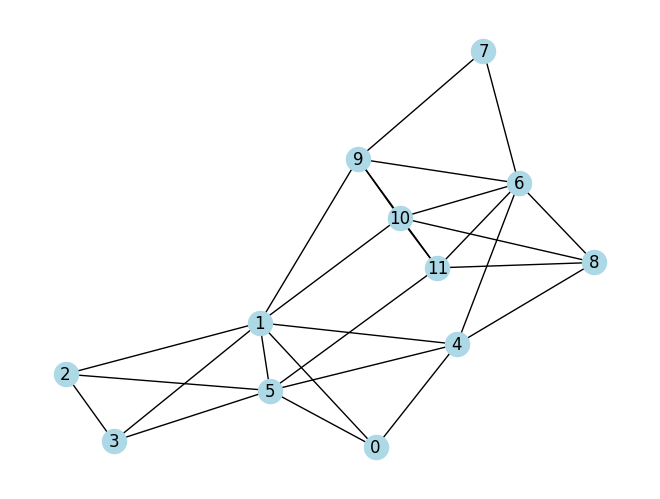

In [17]:
H = nx.planted_partition_graph(l=2, k=6, p_in=0.6, p_out=0.05)
nx.draw(H, with_labels=True, node_color="lightblue")
plt.show()
